# Problem Statement:
* This assignment challenges students to construct and train a neural network to accurately classify handwritten digits from the MNIST dataset. The goal is to navigate through the preprocessing of image data, select an appropriate neural
network architecture, and apply optimization techniques to achieve high classification accuracy.


In [ ]:
# importing library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.keras.datasets as datasets
from tensorflow.keras.utils import to_categorical


In [ ]:
# load the dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


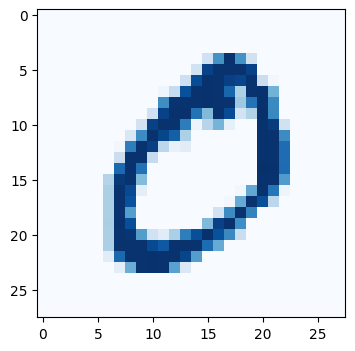

In [ ]:
# visualize the data
plt.figure(figsize=(4,4))
plt.imshow(train_images[1], cmap='Blues')
plt.show()

In [ ]:
# load the dataset
train_images.shape,train_labels.shape,test_images.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
# normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# create the model
def create_model():
  model = models.Sequential([
      layers.Input(shape=(28,28)),
      layers.Flatten(),
      layers.Dense(128,activation='relu'),
      layers.Dense(10,activation='softmax')
  ])
  return model


In [ ]:
model = create_model()
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics =['accuracy'])

In [ ]:
# train the model
history = model.fit(train_images, train_labels,epochs=10,validation_split=0.1,batch_size=30)

Epoch 1/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8701 - loss: 0.4546 - val_accuracy: 0.9665 - val_loss: 0.1213
Epoch 2/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9611 - loss: 0.1279 - val_accuracy: 0.9745 - val_loss: 0.0982
Epoch 3/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9754 - loss: 0.0830 - val_accuracy: 0.9767 - val_loss: 0.0837
Epoch 4/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9824 - loss: 0.0593 - val_accuracy: 0.9765 - val_loss: 0.0769
Epoch 5/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9872 - loss: 0.0427 - val_accuracy: 0.9770 - val_loss: 0.0756
Epoch 6/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9906 - loss: 0.0335 - val_accuracy: 0.9783 - val_loss: 0.0804
Epoch 7/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9912 - loss: 0.0293 - val_accuracy: 0.9767 - val_loss: 0.0877
Epoch 8/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9943 - loss: 0.0211

In [ ]:
#evaluate the model
test_loss,  test_acc = model.evaluate(test_images, test_labels, verbose=1)
print(f"\nTest Accuracy : {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9738 - loss: 0.0959

Test Accuracy : 0.9760000109672546


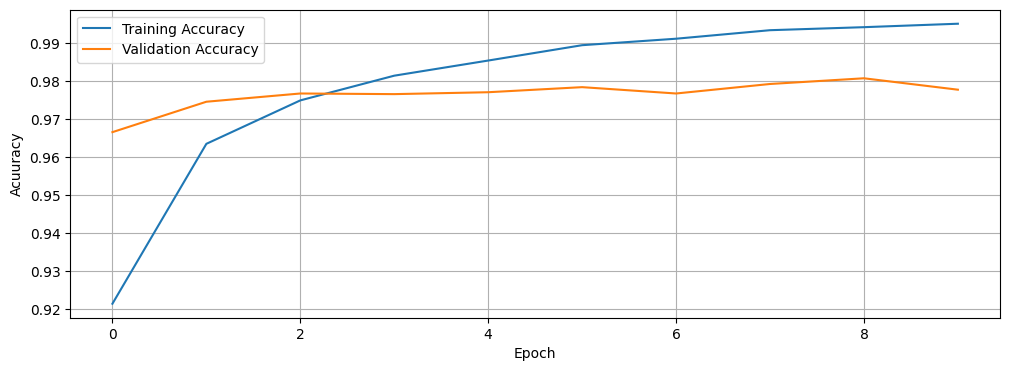

In [ ]:
# Plot the training and validation accuracy over epochs
plt.figure(figsize=(12,4))
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Acuuracy")
plt.legend()
plt.grid(True)

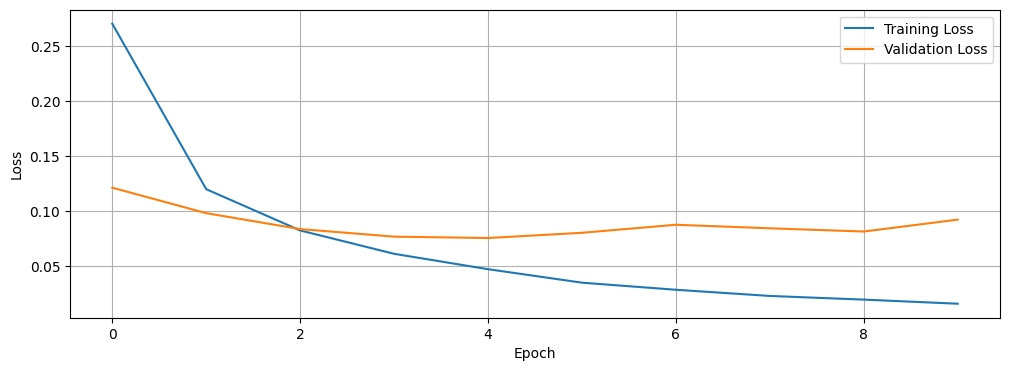

In [ ]:
# Plot the training and validation loss over epochs
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

In [ ]:
# Save The Model
model.save("minst_ann_model.keras")
print(f"Model is saved successfully!")

Model is saved successfully!


In [ ]:
# Function to load an image, preprocess it, and make a prediction
from PIL import Image, ImageOps
def predict_image(image_path, model):
    img = Image.open(image_path).convert("L")    #loaded the image in 1 channel - gray scale
    img = ImageOps.invert(img)                   # inverted image - 0-lohjt- 255 dark
    img = img.resize((28,28))                    #rezingin 28,28 - downsmaplinhg
    img_array = np.array(img)                          # comnvrt numpy array
    img_array = img_array.astype('float32')/255  #normalzied
    img_array = img_array.reshape((1,28,28,1))

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    return predicted_class,confidence

In [ ]:
# Function to load the model and make predictions on a new image
def load_model_and_predict(image_path):
    loaded_model = tf.keras.models.load_model('minst_ann_model.keras')
    predicted_class, confidence = predict_image(image_path,loaded_model)
    print(f"Predicted class : {predicted_class}")
    print(f"Confidence : {confidence}")

    #show the image
    img = Image.open(image_path).convert("L")
    plt.imshow(img,cmap='gray')
    plt.title(f"Predicted : {predicted_class}\nConfidence :{confidence}")
    plt.axis('off')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Predicted class : 7
Confidence : 0.9995009899139404


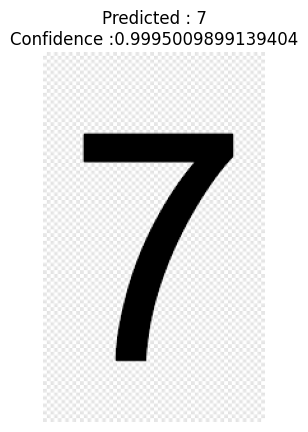

In [ ]:
# checking
load_model_and_predict('/content/download.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted class : 7
Confidence : 0.9999972581863403


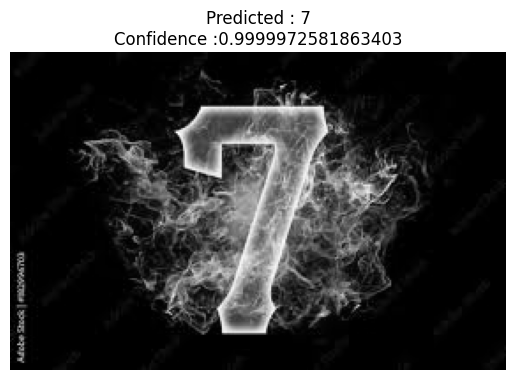

In [ ]:
# Checking
load_model_and_predict('/content/download (7).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted class : 6
Confidence : 0.5258747935295105


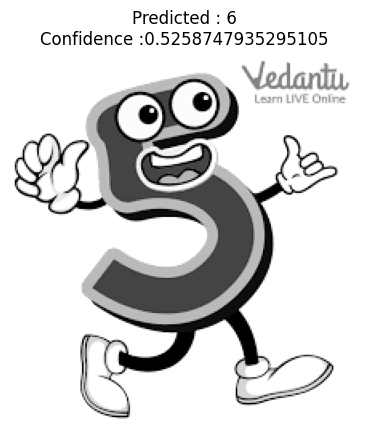

In [ ]:
# Checking
load_model_and_predict('/content/download (2).png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Predicted class : 5
Confidence : 0.9998039603233337


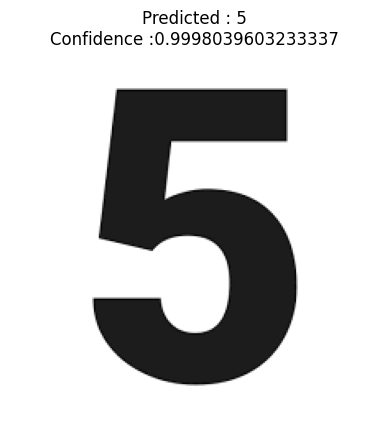

In [ ]:
# checking
load_model_and_predict('/content/download (3).png')